# Marketing Analytics Final Project

## Data Preparation

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

In [2]:
# import data

dfengage = pd.read_pickle ( "C:\\Users\\veron\\Downloads\\engagement" )
dfengage.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [3]:
dfsubscribe = pd.read_pickle("C:\\Users\\veron\\Downloads\\subscribers")
dfsubscribe.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [4]:
dfreps = pd.read_pickle("C:\\Users\\veron\\Downloads\\customer_service_reps")
dfreps.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [5]:
dfchannel = pd.read_csv("C:\\Users\\veron\\Downloads\\Copy of channel_spend_graduate.csv")
dfchannel.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [6]:
# merge dataframes by subid

df1 = dfsubscribe.merge(dfengage, on="subid")
df1.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,refund_after_trial_TF,payment_type,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,NaN,2019-12-07,1.0,1.0,7.0,7.0,0.0,0.0,0.0
1,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,NaN,2019-12-08,1.0,1.0,6.0,6.0,0.0,1.0,0.0
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,False,Standard Charter,2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,False,Standard Charter,2020-02-25,1.0,0.0,7.0,7.0,0.0,0.0,0.0
4,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,False,Standard Charter,2020-02-26,1.0,2.0,6.0,6.0,0.0,1.0,0.0


In [7]:
dfmerged = df1.merge(dfreps, on="subid")
dfmerged.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period_y,last_payment,next_payment,renew
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-08 15:05:25,2019-12-07 16:37:06,14,False,OTT,0.0000,0,2019-12-07 17:34:29,NaT,False
1,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-08 15:05:25,2019-12-07 16:37:06,14,False,OTT,0.0000,0,2019-12-07 17:34:29,NaT,False
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,0,2020-02-19 19:45:46,2020-03-05 13:52:53,True
3,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,1,2020-03-05 13:52:53,NaT,False
4,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,0,2020-02-19 19:45:46,2020-03-05 13:52:53,True


In [8]:
dfmerged.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date_x',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF',
       'payment_type', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period_x',
       'customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'account_creation_date_y', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_per

In [9]:
dfsub = pd.read_csv ( "C:\\Users\\veron\\Downloads\\Copy of subscribers.csv")
dfsub.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [10]:
dfsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

## A/B Testing

In [11]:
from scipy.stats import norm

In [12]:
P_base = 130020/227115
P_base

0.5724853048015323

In [13]:
P_high = 183/340
P_high

0.538235294117647

In [14]:
P_low = 47/173
P_low

0.27167630057803466

In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [16]:
successes = [183, 130020]
nobs = [340, 227115]

In [17]:
z_stat, pval = proportions_ztest(successes, nobs=nobs)
z_stat

-1.2755898561910752

In [18]:
pval

0.20210054177646342

In [19]:
success = [173, 130020]
nob = [47, 227115]

In [20]:
z_stat1, pval1 = proportions_ztest(success, nobs=nob)
z_stat1

43.07859402633364

In [21]:
pval1

0.0

## Customer Segmentation

In [22]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [23]:
dfseg = dfsub[["subid", "preferred_genre", "intended_use", "age", "package_type", "weekly_consumption_hour"]]
dfseg.head()

,subid,preferred_genre,intended_use,age,package_type,weekly_consumption_hour
0,21724479,comedy,access to exclusive content,NaN,economy,NaN
1,23383224,comedy,access to exclusive content,70.0,base,22.951579
2,26844789,regional,replace OTT,25.0,enhanced,36.001186
3,29417030,drama,replace OTT,30.0,base,20.051667
4,26723159,comedy,replace OTT,28.0,base,22.951579


In [24]:
dfseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subid                    227628 non-null  int64  
 1   preferred_genre          191302 non-null  object 
 2   intended_use             224079 non-null  object 
 3   age                      192459 non-null  float64
 4   package_type             192054 non-null  object 
 5   weekly_consumption_hour  189698 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.4+ MB


In [25]:
dfseg.isnull().sum()

subid                          0
preferred_genre            36326
intended_use                3549
age                        35169
package_type               35574
weekly_consumption_hour    37930
dtype: int64

In [26]:
# drop null values

dfseg1 = dfseg.dropna(axis = 0, subset=["preferred_genre", "intended_use", "age", "package_type", "weekly_consumption_hour"])
dfseg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154955 entries, 1 to 227627
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subid                    154955 non-null  int64  
 1   preferred_genre          154955 non-null  object 
 2   intended_use             154955 non-null  object 
 3   age                      154955 non-null  float64
 4   package_type             154955 non-null  object 
 5   weekly_consumption_hour  154955 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.3+ MB


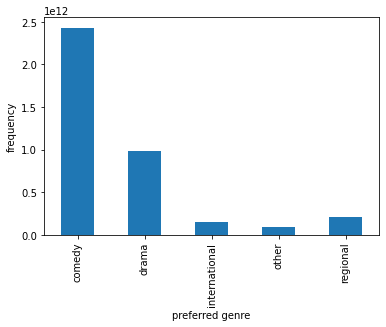

In [27]:
dfseg1.groupby("preferred_genre").sum()["subid"].plot.bar()
plt.xlabel("preferred genre")
plt.ylabel("frequency")
plt.show()

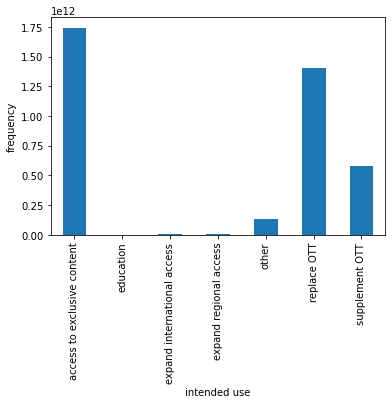

In [28]:
dfseg1.groupby("intended_use").sum()["subid"].plot.bar()
plt.xlabel("intended use")
plt.ylabel("frequency")
plt.show()

In [29]:
dfseg1.dtypes

subid                        int64
preferred_genre             object
intended_use                object
age                        float64
package_type                object
weekly_consumption_hour    float64
dtype: object

In [30]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

df_cat = pd.DataFrame(one_hot.fit_transform(dfseg1.loc[:,['preferred_genre', 'intended_use', 'package_type']]))
one_hot.get_feature_names()

array(['x0_comedy', 'x0_drama', 'x0_international', 'x0_other',
       'x0_regional', 'x1_access to exclusive content', 'x1_education',
       'x1_expand international access', 'x1_expand regional access',
       'x1_other', 'x1_replace OTT', 'x1_supplement OTT', 'x2_base',
       'x2_economy', 'x2_enhanced'], dtype=object)

In [31]:
df_cat.columns = ['comedy', 'drama', 'international', 'other',
       'regional', 'access to exclusive content', 'education',
       'expand international access', 'expand regional access',
       'other', 'replace OTT', 'supplement OTT', 'base',
       'economy', 'enhanced']
df_cat.head()

,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,base,economy,enhanced
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
dfseg2 = dfseg1.drop(['preferred_genre', 'intended_use', 'package_type'],axis = 1,inplace=True)

C:\Users\veron\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df_new = pd.concat((dfseg2,df_cat),axis = 1)
df_new.head()

,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,base,economy,enhanced
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
df_new.isnull().sum()

comedy                         0
drama                          0
international                  0
other                          0
regional                       0
access to exclusive content    0
education                      0
expand international access    0
expand regional access         0
other                          0
replace OTT                    0
supplement OTT                 0
base                           0
economy                        0
enhanced                       0
dtype: int64

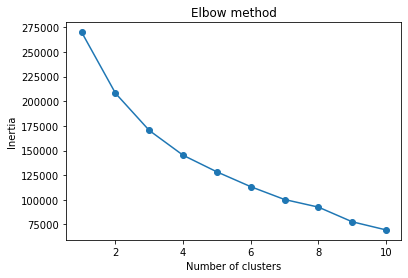

In [38]:
# elbow test

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
km = KMeans(n_clusters = 3)
km.fit(df_new)
label = km.labels_
center = km.cluster_centers_

In [43]:
df_new['labels']=km.labels_

In [44]:
df_new['labels'].value_counts()

1    70869
2    42715
0    41371
Name: labels, dtype: int64

In [45]:
df_new.to_csv('MA_Final_Cluster.csv')

## Budget Allocation

In [39]:
dfchannel.groupby("channel").sum()

,date,spend_AED
channel,,
bing,1615460,10800
display,1615460,366
facebook,1615460,113500
search,1615460,222500
youtube,1615460,8730


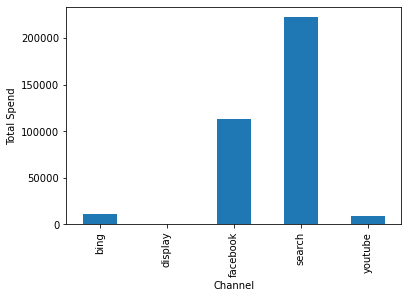

In [40]:
dfchannel.groupby("channel").sum()["spend_AED"].plot.bar()
plt.xlabel("Channel")
plt.ylabel("Total Spend")
plt.show()

In [52]:
dfallocation = dfsub[["attribution_technical", "attribution_survey", "current_sub_TF"]]
dfallocation.head()

,attribution_technical,attribution_survey,current_sub_TF
0,facebook,facebook,True
1,facebook,facebook,True
2,organic,facebook,False
3,search,tv,False
4,discovery,youtube,True


In [48]:
dfallocation[dfallocation.current_sub_TF == True].attribution_technical.value_counts()

facebook                   41236
search                     16539
email                      14573
organic                    12790
brand sem intent google    10465
google_organic              6904
affiliate                   6081
referral                    4391
pinterest                   3987
email_blast                 3493
facebook_organic            1743
discovery                   1546
other                       1134
brand sem intent bing       1076
podcast                      832
display                      799
youtube                      730
bing                         574
internal                     555
bing_organic                 207
vod                          190
ott                          123
direct_mail                  101
quora                         57
appstore                      38
pinterest_organic             24
influencer                    18
criteo                        16
samsung                       16
playstore                      8
tv        

In [49]:
dfallocation.attribution_technical.value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [51]:
convert1 = len(dfallocation[dfallocation.attribution_technical == 'facebook'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'facebook'])
print(convert1)
convert2 = len(dfallocation[dfallocation.attribution_technical == 'search'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'search'])
print(convert2)
convert3 = len(dfallocation[dfallocation.attribution_technical == 'bing'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'bing'])
print(convert3)
convert4 = len(dfallocation[dfallocation.attribution_technical == 'display'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'diaplay'])
print(convert4)
convert5 = len(dfallocation[dfallocation.attribution_technical == 'youtube'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'youtube'])
print(convert5)


C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1384245929.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert1 = len(dfallocation[dfallocation.attribution_technical == 'facebook'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'facebook'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1384245929.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert2 = len(dfallocation[dfallocation.attribution_technical == 'search'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'search'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1384245929.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert3 = len(dfallocation[dfallocation.attribution_technical == 'bing'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'bing'])


0.5138378337964636
0.6535604204536474
0.5008726003490401


C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1384245929.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convert4 = len(dfallocation[dfallocation.attribution_technical == 'display'][dfallocation.current_sub_TF == True]) / len(dfallocation[dfallocation.attribution_technical == 'diaplay'])


ZeroDivisionError: division by zero

In [64]:
# last interact

dfallocation["last_interact"] = dfallocation.attribution_survey

In [65]:
dfallocation.last_interact[dfallocation.last_interact.isna()] = dfallocation[dfallocation.attribution_survey.isna()].attribution_technical

C:\Users\veron\AppData\Local\Temp/ipykernel_9632/4038848482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfallocation.last_interact[dfallocation.last_interact.isna()] = dfallocation[dfallocation.attribution_survey.isna()].attribution_technical


In [66]:
dfallocation.head()

,attribution_technical,attribution_survey,current_sub_TF,last_interact
0,facebook,facebook,True,facebook
1,facebook,facebook,True,facebook
2,organic,facebook,False,facebook
3,search,tv,False,tv
4,discovery,youtube,True,youtube


In [67]:
cost_bing = 10800
cost_display = 366
cost_facebook = 113500
cost_search = 222500
cost_youtube = 8730

CAC_bing = cost_bing / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'bing'])
print('Bing: %.2f'%CAC_bing)
CAC_display = cost_display / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'display'])
print('Display: %.2f'%CAC_display)
CAC_facebook = cost_facebook / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'facebook'])
print('Facebook: %.2f'%CAC_facebook)
CAC_search = cost_search / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'search'])
print('Search: %.2f'%CAC_search)
CAC_youtube = cost_youtube / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'youtube'])
print('Youtube: %.2f'%CAC_youtube)

C:\Users\veron\AppData\Local\Temp/ipykernel_9632/84253199.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_bing = cost_bing / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'bing'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/84253199.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_display = cost_display / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'display'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/84253199.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_facebook = cost_facebook / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'facebook'])


Bing: 2700.00
Display: 183.00
Facebook: 1.89
Search: 35.19
Youtube: 3.49


C:\Users\veron\AppData\Local\Temp/ipykernel_9632/84253199.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_search = cost_search / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'search'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/84253199.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_youtube = cost_youtube / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.last_interact == 'youtube'])


In [68]:
# first interaction

dfallocation["first_interact"] = dfallocation.attribution_technical
dfallocation.head()

,attribution_technical,attribution_survey,current_sub_TF,last_interact,first_interact
0,facebook,facebook,True,facebook,facebook
1,facebook,facebook,True,facebook,facebook
2,organic,facebook,False,facebook,organic
3,search,tv,False,tv,search
4,discovery,youtube,True,youtube,discovery


In [69]:
cost_bing = 10800
cost_display = 366
cost_facebook = 113500
cost_search = 222500
cost_youtube = 8730

CAC_bing = cost_bing / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'bing'])
print('Bing: %.2f'%CAC_bing)
CAC_display = cost_display / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'display'])
print('Display: %.2f'%CAC_display)
CAC_facebook = cost_facebook / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'facebook'])
print('Facebook: %.2f'%CAC_facebook)
CAC_search = cost_search / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'search'])
print('Search: %.2f'%CAC_search)
CAC_youtube = cost_youtube / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'youtube'])
print('Youtube: %.2f'%CAC_youtube)

C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1539790296.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_bing = cost_bing / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'bing'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1539790296.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_display = cost_display / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'display'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1539790296.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_facebook = cost_facebook / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'facebook'])


Bing: 18.82
Display: 0.46
Facebook: 2.75
Search: 13.45
Youtube: 11.96


C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1539790296.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_search = cost_search / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'search'])
C:\Users\veron\AppData\Local\Temp/ipykernel_9632/1539790296.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CAC_youtube = cost_youtube / len(dfallocation[dfallocation.current_sub_TF == True][dfallocation.first_interact == 'youtube'])


In [70]:
# linear interaction

dfallocation = dfallocation.drop(columns = ['last_interact','first_interact'])

In [72]:
dfallocation['bing'] = (dfallocation['attribution_technical'] == 'bing').astype('int') + (dfallocation['attribution_survey'] == 'bing').astype('int') 
dfallocation['display'] = (dfallocation['attribution_technical'] == 'display').astype('int') + (dfallocation['attribution_survey'] == 'display').astype('int') 
dfallocation['facebook'] = (dfallocation['attribution_technical'] == 'facebook').astype('int') + (dfallocation['attribution_survey'] == 'facebook').astype('int') 
dfallocation['search'] = (dfallocation['attribution_technical'] == 'search').astype('int') + (dfallocation['attribution_survey'] == 'search').astype('int')
dfallocation['youtube'] = (dfallocation['attribution_technical'] == 'youtube').astype('int') + (dfallocation['attribution_survey'] == 'youtube').astype('int') 

In [73]:
df_convert = dfallocation[dfallocation.current_sub_TF == True]

In [75]:
df_convert['total'] = df_convert['bing'] + df_convert['display'] + df_convert['facebook'] + df_convert['search'] + df_convert['youtube']
df_convert

C:\Users\veron\AppData\Local\Temp/ipykernel_9632/812540984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_convert['total'] = df_convert['bing'] + df_convert['display'] + df_convert['facebook'] + df_convert['search'] + df_convert['youtube']


,attribution_technical,attribution_survey,current_sub_TF,bing,display,facebook,search,youtube,total
0,facebook,facebook,True,0,0,2,0,0,2
1,facebook,facebook,True,0,0,2,0,0,2
4,discovery,youtube,True,0,0,0,0,1,1
5,bing,tv,True,1,0,0,0,0,1
6,bing,search,True,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
227622,email,pinterest,True,0,0,0,0,0,0
227623,facebook,facebook_organic,True,0,0,1,0,0,1
227624,google_organic,referral,True,0,0,0,0,0,0
227625,facebook,facebook,True,0,0,2,0,0,2


In [77]:
for a in ['bing', 'display', 'facebook', 'search', 'youtube']:
    df_convert[a] = df_convert[a] / df_convert['total']
    
df_convert

C:\Users\veron\AppData\Local\Temp/ipykernel_9632/3927858513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_convert[a] = df_convert[a] / df_convert['total']


,attribution_technical,attribution_survey,current_sub_TF,bing,display,facebook,search,youtube,total
0,facebook,facebook,True,0.00,0.0,0.5,0.00,0.0,2
1,facebook,facebook,True,0.00,0.0,0.5,0.00,0.0,2
4,discovery,youtube,True,0.00,0.0,0.0,0.00,1.0,1
5,bing,tv,True,1.00,0.0,0.0,0.00,0.0,1
6,bing,search,True,0.25,0.0,0.0,0.25,0.0,2
...,...,...,...,...,...,...,...,...,...
227622,email,pinterest,True,NaN,NaN,NaN,NaN,NaN,0
227623,facebook,facebook_organic,True,0.00,0.0,1.0,0.00,0.0,1
227624,google_organic,referral,True,NaN,NaN,NaN,NaN,NaN,0
227625,facebook,facebook,True,0.00,0.0,0.5,0.00,0.0,2


In [78]:
cost_bing = 10800
cost_display = 366
cost_facebook = 113500
cost_search = 222500
cost_youtube = 8730

CAC_bing = cost_bing / df_convert.bing.sum()
print('bing: %.2f'%CAC_bing)
CAC_display = cost_display / df_convert.display.sum()
print('display: %.2f'%CAC_display)
CAC_facebook = cost_facebook / df_convert.facebook.sum()
print('facebook: %.2f'%CAC_facebook)
CAC_search = cost_search / df_convert.search.sum()
print('search: %.2f'%CAC_search)
CAC_youtube = cost_youtube / df_convert.youtube.sum()
print('youtube: %.2f'%CAC_youtube)

bing: 29.67
display: 0.77
facebook: 2.32
search: 16.16
youtube: 4.26
